In [1]:
import langchain
import pandas as pd
from typing import Dict, List, Any

In [3]:
from langchain_core.documents import Document
from langchain_text_splitters import CharacterTextSplitter, RecursiveCharacterTextSplitter, TokenTextSplitter

# Understanding Document structure in Langchain

In [4]:
doc = Document(
    page_content = "This is the main content that will be embedded and searched",
    metadata = {
        "source": "example.txt",
        "author": "Babu Lamani",
        "dateCreated": "2025-11-12",
        "page": "12",
        "custom_field": "any_value"
    }
)
print(f"Document structure:\n Content: {doc.page_content}\n Metadata: {doc.metadata}")

Document structure:
 Content: This is the main content that will be embedded and searched
 Metadata: {'source': 'example.txt', 'author': 'Babu Lamani', 'dateCreated': '2025-11-12', 'page': '12', 'custom_field': 'any_value'}


# Text Files

In [5]:
import os
os.makedirs("data/text_files", exist_ok=True)

In [7]:
sample_texts = {
    "data/text_files/python_intro.txt": """
Python is a powerful, high-level programming language designed to be easy to understand and write. Created by Guido van Rossum and first released in 1991, Python focuses on code readability, using clear and expressive syntax that lets developers concentrate more on solving problems than on complex language rules. Because of this simplicity, Python is often recommended as the first programming language for beginners.

Python is an interpreted language, meaning code is executed line by line, which helps in quick testing and debugging. It supports several programming paradigms, such as procedural programming, object-oriented programming, and functional programming, giving developers flexibility in how they structure their applications.

One of Python’s biggest strengths is its rich ecosystem of libraries and frameworks. Tools like NumPy, Pandas, TensorFlow, and PyTorch have made Python the standard language for data science, machine learning, and artificial intelligence. Frameworks like Django and Flask are widely used for building robust web applications. Python is also highly popular in automation, scripting, DevOps, cybersecurity, and scientific computing.

Python runs on all major operating systems and has a huge global community that constantly contributes to its growth. Whether you're building a small automation script or a large-scale enterprise application, Python’s versatility and simplicity make it a go-to choice for developers across industries.
"""
}

for filepath, content in sample_texts.items():
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(content)
print("Sample text files created")

Sample text files created


## Using TextLoader - read single file

In [11]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("data/text_files/python_intro.txt", encoding="utf-8")
loader.load()

[Document(metadata={'source': 'data/text_files/python_intro.txt'}, page_content="\nPython is a powerful, high-level programming language designed to be easy to understand and write. Created by Guido van Rossum and first released in 1991, Python focuses on code readability, using clear and expressive syntax that lets developers concentrate more on solving problems than on complex language rules. Because of this simplicity, Python is often recommended as the first programming language for beginners.\n\nPython is an interpreted language, meaning code is executed line by line, which helps in quick testing and debugging. It supports several programming paradigms, such as procedural programming, object-oriented programming, and functional programming, giving developers flexibility in how they structure their applications.\n\nOne of Python’s biggest strengths is its rich ecosystem of libraries and frameworks. Tools like NumPy, Pandas, TensorFlow, and PyTorch have made Python the standard lang

## DirectoryLoader - read all documents from a directory

In [12]:
from langchain_community.document_loaders import DirectoryLoader

In [14]:
dir_loader = DirectoryLoader(
    "data/text_files", # path to directory containing text files
    glob="**/*.txt", # pattern to match files
    loader_cls=TextLoader, ## Loader class to use
    show_progress=True,
    loader_kwargs={"encoding": "utf-8"}
)

loader = dir_loader.load()
loader

100%|██████████| 2/2 [00:00<00:00, 1230.54it/s]


[Document(metadata={'source': 'data\\text_files\\python_intro.txt'}, page_content="\nPython is a powerful, high-level programming language designed to be easy to understand and write. Created by Guido van Rossum and first released in 1991, Python focuses on code readability, using clear and expressive syntax that lets developers concentrate more on solving problems than on complex language rules. Because of this simplicity, Python is often recommended as the first programming language for beginners.\n\nPython is an interpreted language, meaning code is executed line by line, which helps in quick testing and debugging. It supports several programming paradigms, such as procedural programming, object-oriented programming, and functional programming, giving developers flexibility in how they structure their applications.\n\nOne of Python’s biggest strengths is its rich ecosystem of libraries and frameworks. Tools like NumPy, Pandas, TensorFlow, and PyTorch have made Python the standard la

# Text splitting strategies

In [15]:
from langchain_text_splitters import CharacterTextSplitter, RecursiveCharacterTextSplitter, TokenTextSplitter

In [17]:
document = loader[1].page_content
document

"The **Ramayana** is one of the greatest ancient epics of India, traditionally attributed to the sage Valmiki. It narrates the journey of Lord Rama, an incarnation of Vishnu, whose life represents the ideals of virtue, duty, and righteousness. The story begins in the prosperous kingdom of Ayodhya, ruled by the noble King Dasharatha. For many years, the king has no children, and after conducting a sacred ritual, he is blessed with four sons—Rama, Bharata, Lakshmana, and Shatrughna. Among them, Rama, born to Queen Kausalya, stands out in strength, character, and wisdom. He is loved deeply by the people of Ayodhya, who see him as the perfect heir to the throne.\n\nRama’s early life is marked by learning, discipline, and exemplary conduct. As a young prince, he accompanies the sage Vishwamitra to protect the sage’s rituals from demons. With calm strength, Rama destroys Tadaka, Subahu, and Maricha, demonstrating his divine powers. Later, he attends the swayamvara of Princess Sita of Mithila

In [23]:
len(document)

7100

## CharacterTextSplitter

In [ ]:
char_splitter = CharacterTextSplitter(
    separator=" ", # \n for new lines, \n\n for paragraphs, also " ", "\t" etc
    chunk_size = 200,
    chunk_overlap = 20,
    length_function=len
)

char_chunks = char_splitter.split_text(document)
len(char_chunks)

40

In [24]:
print(char_chunks[0])
print("----------------")
print(char_chunks[1])

The **Ramayana** is one of the greatest ancient epics of India, traditionally attributed to the sage Valmiki. It narrates the journey of Lord Rama, an incarnation of Vishnu, whose life represents the
----------------
life represents the ideals of virtue, duty, and righteousness. The story begins in the prosperous kingdom of Ayodhya, ruled by the noble King Dasharatha. For many years, the king has no children, and


## RecursiveTextSplitter

In [28]:
char_splitter = RecursiveCharacterTextSplitter(
    separators = ["\n", "\n\n", " ", ""],
    chunk_size = 200,
    chunk_overlap = 20,
    length_function = len
)

char_chunks = char_splitter.split_text(document)
len(char_chunks)

42

In [29]:
print(char_chunks[0])
print("----------------")
print(char_chunks[1])

The **Ramayana** is one of the greatest ancient epics of India, traditionally attributed to the sage Valmiki. It narrates the journey of Lord Rama, an incarnation of Vishnu, whose life represents the
----------------
life represents the ideals of virtue, duty, and righteousness. The story begins in the prosperous kingdom of Ayodhya, ruled by the noble King Dasharatha. For many years, the king has no children, and


## TokenTextSplitter

In [ ]:
token_splitter = TokenTextSplitter(
    chunk_size = 200, # size in tokens, not chars
    chunk_overlap = 20
)

token_chunks = token_splitter.split_text(document)
print(len(token_chunks))

10


In [31]:
print(token_chunks[0])
print("----------------")
print(token_chunks[1])

The **Ramayana** is one of the greatest ancient epics of India, traditionally attributed to the sage Valmiki. It narrates the journey of Lord Rama, an incarnation of Vishnu, whose life represents the ideals of virtue, duty, and righteousness. The story begins in the prosperous kingdom of Ayodhya, ruled by the noble King Dasharatha. For many years, the king has no children, and after conducting a sacred ritual, he is blessed with four sons—Rama, Bharata, Lakshmana, and Shatrughna. Among them, Rama, born to Queen Kausalya, stands out in strength, character, and wisdom. He is loved deeply by the people of Ayodhya, who see him as the perfect heir to the throne.

Rama’s early life is marked by learning, discipline, and exemplary conduct. As a young prince, he accompanies the sage Vishwamitra to protect
----------------
 and exemplary conduct. As a young prince, he accompanies the sage Vishwamitra to protect the sage’s rituals from demons. With calm strength, Rama destroys Tadaka, Subahu, an

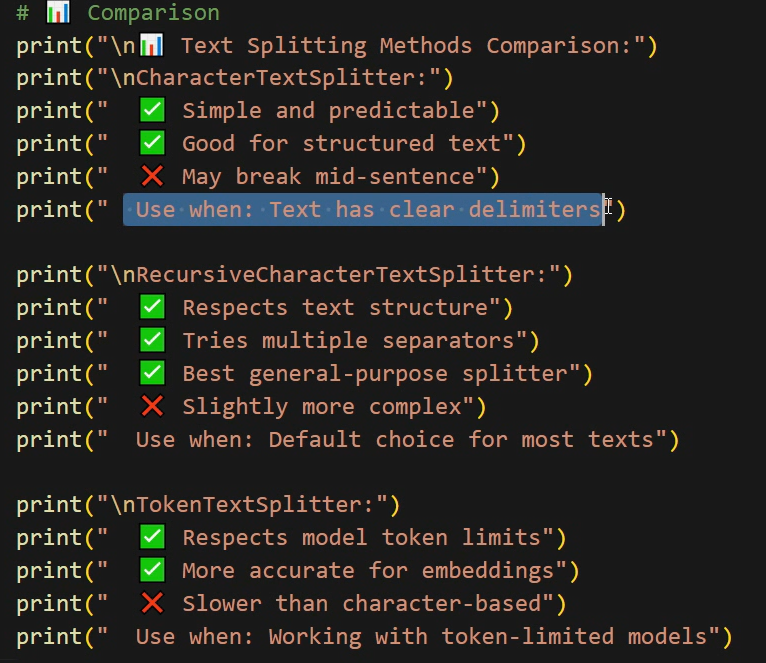